In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.stats as st

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_datapath = "Data/mouse_drug_data.csv"
mouse_drug_datapath = "Data/Mouse_metadata.csv"
clinicaltrial_datapath= "Data/clinicaltrial_data.csv"

In [2]:
mousedrug_datadf = pd.read_csv(mouse_drug_datapath )
mousedrug_datadf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
clinicaltrial_datadf = pd.read_csv(clinicaltrial_datapath)
clinicaltrial_datadf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
#Merged the mouse_drug data and the clinicaltrial_data   
merged_dataset = pd.merge(mousedrug_datadf,clinicaltrial_datadf, how="left",on="Mouse ID")

#Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Tumor Response to Treatment

In [5]:
#Group the merged dataset by the prescribed drug and theh Timepoint
DrugTime_data = merged_dataset.groupby(["Drug Regimen","Timepoint"])
DrugTime_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1131,l661,Ceftamin,Male,18,26,40,59.205669,3
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1193,m550,Ketapril,Male,18,28,45,69.253503,4
1290,o562,Propriva,Female,4,25,45,72.455421,2


In [6]:
DrugTime_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1131,l661,Ceftamin,Male,18,26,40,59.205669,3
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1193,m550,Ketapril,Male,18,28,45,69.253503,4
1290,o562,Propriva,Female,4,25,45,72.455421,2


In [7]:
merged_datasetindexdrug = merged_dataset.set_index("Drug Regimen")
merged_datasetindexdrug.head(5)
groupedmerged_dataset = merged_dataset.groupby(["Drug Regimen","Timepoint"])
merged_datasetindexdrug.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [8]:
#merged_dataset['Drug Regimen'].unique()
groupedmerged_dataset['Drug Regimen'].unique()

Drug Regimen  Timepoint
Capomulin     0            [Capomulin]
              5            [Capomulin]
              10           [Capomulin]
              15           [Capomulin]
              20           [Capomulin]
                              ...     
Zoniferol     25           [Zoniferol]
              30           [Zoniferol]
              35           [Zoniferol]
              40           [Zoniferol]
              45           [Zoniferol]
Name: Drug Regimen, Length: 100, dtype: object

In [9]:
groupedmerged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1131,l661,Ceftamin,Male,18,26,40,59.205669,3
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1193,m550,Ketapril,Male,18,28,45,69.253503,4
1290,o562,Propriva,Female,4,25,45,72.455421,2


    #Drug Regimen & Tumor Volume Data Frame
merged_datasetdrug = merged_dataset['Drug Regimen']
merged_datasetvol = merged_dataset['Tumor Volume (mm3)']
drug1 = pd.DataFrame(merged_datasetdrug)
drug2 = pd.DataFrame(merged_datasetvol)
drugvoldf = drug1 + drug2
drugvoldf

    #Drug Dictionary and Volume loop
drugdictionary = {'Ramicane':[],
                  'Capomulin':[],
                  'Infubinol':[],
                  'Placebo':[],
                  'Ceftamin':[],
                  'Stelasyn':[],
                  'Zoniferol':[], 
                  'Ketapril':[], 
                  'Propriva':[],
                  'Naftisol':[]
                 }
drugvoldf = merged_datasetindexdrug["Tumor Volume (mm3)"]

for drugname in range(len(drugvoldf)):
    #print(merged_datasetindexdrug[drugname])
    #print(merged_datasetindexdrug)
    print(drugvoldf[drugname])

    #for drugsort in drugdictionary:
        #print(drugdictionary[drugsort])
        #if drugname == drugsort:
         #   drugdictionary[drugsort].append(merged_dataset[drugname]["Tumor Volume (mm3)"])
    

# Variables
mousedrug_datadf
clinicaltrial_datadf
merged_dataset
DrugTime_data
merged_datasetindexdrug

mean_mtumorvol
pivotmean
metsitesmean
pivotmeanmet

stdErr_mtumorvol
stdErrdf
pivotstde
metsitesstde
pivotstdemet

survivalcount
pivotsurvivalcount

tumorchangedata
tumorchange


#The merged dataset with only the drug, mean, median, var, std, sem
groupedresultsdf = merged_dataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[]

In [10]:
mean_mtumorvol = merged_dataset.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_mtumorvol = pd.DataFrame(mean_mtumorvol)
mean_mtumorvol.head()
#mean_mtumorvol.index
type(mean_mtumorvol)
mean_mtumorvol

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
...                                    ...
Zoniferol    25                  55.432935
             30                  57.713531
             35                  60.089372
             40                  62.916692
             45                  65.960888

[100 rows x 1 columns]

In [11]:
mean_mtumorvol["Tumor Volume (mm3)"]

Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            44.266086
              10           43.084291
              15           42.064317
              20           40.716325
                             ...    
Zoniferol     25           55.432935
              30           57.713531
              35           60.089372
              40           62.916692
              45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [12]:
mean_mtumorvol.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325

In [13]:
mean_mtumorvol = mean_mtumorvol.reset_index() 
pivotmean = mean_mtumorvol.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]
pivotmean.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [14]:

stdErr_mtumorvol = merged_dataset.groupby(["Drug Regimen","Timepoint"]).sem()["Tumor Volume (mm3)"]
stdErrdf = pd.DataFrame(stdErr_mtumorvol)
stdErrdf.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

In [15]:
stdErrdf = stdErrdf.reset_index()
pivotstde = stdErrdf.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]
pivotstde.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [16]:
pivotstde.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [17]:
pivotmean["Capomulin"]

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

NameError: name 'arr1' is not defined

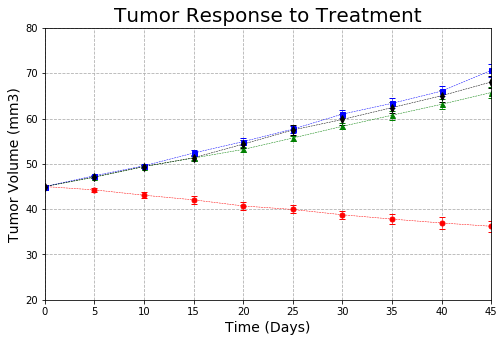

In [18]:
#Plotting the Line Graph
plt.figure(figsize=(8,5))
plt.errorbar(pivotmean.index, pivotmean["Capomulin"], yerr = pivotstde["Capomulin"],marker ="o",color="r",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmean.index, pivotmean["Infubinol"], yerr = pivotstde["Infubinol"],marker ="^",color="g",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmean.index, pivotmean["Ketapril"], yerr = pivotstde["Ketapril"],marker ="s",color="b",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmean.index, pivotmean["Placebo"], yerr = pivotstde["Placebo"],marker ="d",color="k",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)

plt.ylim(20,80)
plt.xlim(0,45)

plt.title("Tumor Response to Treatment", fontsize = 20)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend([arr1, arr2, arr3], ['u','v','u+v'])

plt.savefig("Fig1.png")
plt.show()

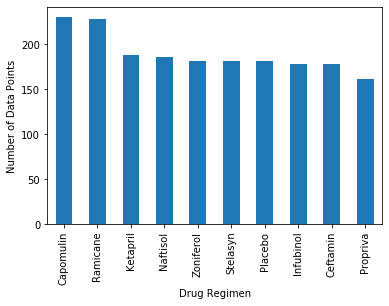

In [19]:
#Plotting the Bar Graph
counts = merged_dataset['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

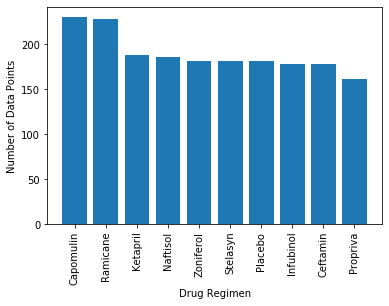

In [20]:
#Plotting the Bar Graph using pyplot
counts = merged_dataset['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

In [21]:
merged_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


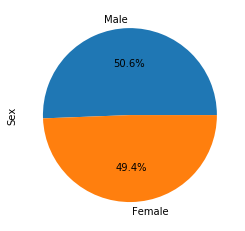

In [22]:
counts = merged_dataset['Sex'].value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

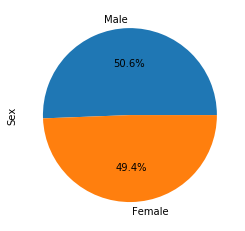

In [23]:
counts = merged_dataset['Sex'].value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Metastatic Response to Treatment

In [24]:
metsitesmean = merged_dataset.groupby(["Drug Regimen","Timepoint"]).mean()["Metastatic Sites"]
metsitesmean = pd.DataFrame(metsitesmean)
metsitesmean.head()
metsitesstde = merged_dataset.groupby(["Drug Regimen","Timepoint"]).sem()["Metastatic Sites"]
metsitesstde = pd.DataFrame(metsitesstde)
metsitesstde.head()
metsitesmean = metsitesmean.reset_index()
pivotmeanmet = metsitesmean.pivot(index="Timepoint",columns="Drug Regimen")["Metastatic Sites"]

metsitesstde = metsitesstde.reset_index()
pivotstdemet = metsitesstde.pivot(index="Timepoint",columns="Drug Regimen")["Metastatic Sites"]
pivotstdemet.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.222607,0.166378


In [25]:
pivotstdemet.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.222607,0.166378


No handles with labels found to put in legend.


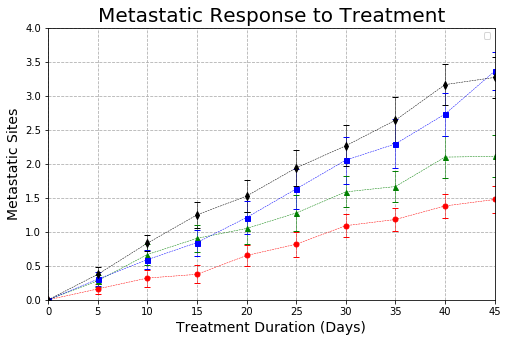

In [26]:
#Plotting the Line Graph
plt.figure(figsize=(8,5))
plt.errorbar(pivotmeanmet.index, pivotmeanmet["Capomulin"], yerr = pivotstdemet["Capomulin"],marker ="o",color="r",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmeanmet.index, pivotmeanmet["Infubinol"], yerr = pivotstdemet["Infubinol"],marker ="^",color="g",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmeanmet.index, pivotmeanmet["Ketapril"], yerr = pivotstdemet["Ketapril"],marker ="s",color="b",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)
plt.errorbar(pivotmeanmet.index, pivotmeanmet["Placebo"], yerr = pivotstdemet["Placebo"],marker ="d",color="k",markersize=5,linestyle="dashed",linewidth=0.50,capsize=3)

plt.ylim(0,4)
plt.xlim(0,45)

plt.title("Metastatic Response to Treatment", fontsize = 20)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize = 'small', fancybox=True)

plt.savefig("Fig2.png")
plt.show()

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalcount = merged_dataset.groupby(["Drug Regimen", "Timepoint"]).count()["Tumor Volume (mm3)"]
survivalcount  = pd.DataFrame(survivalcount)
survivalcount.head()
survivalcount = survivalcount.reset_index()
pivotsurvivalcount = survivalcount.pivot(index="Timepoint",columns="Drug Regimen")["Tumor Volume (mm3)"]
pivotsurvivalcount.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17


No handles with labels found to put in legend.


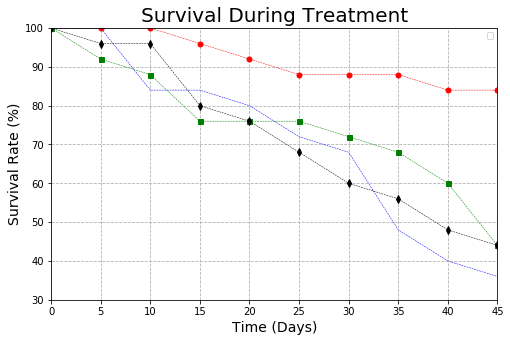

In [28]:
#Plotting the Line Graph
plt.figure(figsize=(8,5))
plt.plot(100 * pivotsurvivalcount["Capomulin"]/25,"ro",linestyle="dashed",markersize=5,linewidth=0.50)
plt.plot(100 * pivotsurvivalcount["Infubinol"]/25,"b",linestyle="dashed",markersize=5,linewidth=0.50)
plt.plot(100 * pivotsurvivalcount["Ketapril"]/25,"gs",linestyle="dashed",markersize=5,linewidth=0.50)
plt.plot(100 * pivotsurvivalcount["Placebo"]/25,"kd",linestyle="dashed",markersize=5,linewidth=0.50)
plt.ylim(30,100)
plt.xlim(0,45)

plt.title("Survival During Treatment", fontsize=20)
plt.ylabel("Survival Rate (%)",fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best",fontsize="small", fancybox=True)

plt.savefig("Fig3.png")
plt.show()

## Summary Bar Graph

In [29]:
tumorchangedata = 100 * (pivotmean.iloc[-1] - pivotmean.iloc[0])
tumorchangedata

Drug Regimen
Capomulin    -876.388620
Ceftamin     1913.242134
Infubinol    2075.556228
Ketapril     2566.295761
Naftisol     2426.550621
Placebo      2308.408222
Propriva     2125.852869
Ramicane    -1004.440521
Stelasyn     2343.831043
Zoniferol    2096.088789
dtype: float64

In [30]:
tumorchange = (tumorchangedata["Capomulin"],
               tumorchangedata["Infubinol"],
               tumorchangedata["Ketapril"],
               tumorchangedata["Placebo"])

In [31]:
type(tumorchange)

tuple

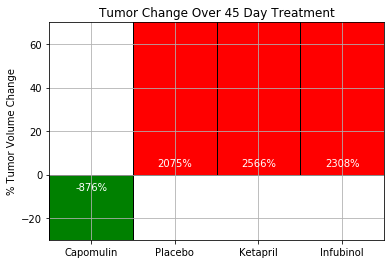

In [32]:
fig, ax = plt.subplots()
ind = np.arange(len(tumorchange))
width=1 

rectsPass = ax.bar(ind[0], tumorchange[0], width,color="green",ec="black")
rectsFail = ax.bar(ind[1:], tumorchange[1:], width, color="red", ec="black")

ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels({"Capomulin", "Infubinol", "Ketapril", "Placebo"})
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.set_xlim([-0.5, 3.5])
ax.grid(True)
    
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom',color='white')
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '%d%%' % int(height),
                ha='center', va='bottom',color='white')
autolabelPass(rectsPass)
autolabelFail(rectsFail)
    
plt.savefig("Fig4.png")
plt.show()